In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [27]:
from datetime import datetime
from os import path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [9]:
path_to_train = path.join(path.abspath('..'), 'data', 'train.csv')
path_to_test = path.join(path.abspath('..'), 'data', 'test.csv')

In [10]:
train = pd.read_csv(path_to_train)
test = pd.read_csv(path_to_test)

In [11]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [14]:
print(f"P(target=1) = {train['target'].sum() / len(train):.3f}")

In [64]:
train['day'] = train['day'].fillna(value=-1)
train['month'] = train['month'].fillna(value=-1)
test['day'] = test['day'].fillna(value=-1)
test['month'] = test['month'].fillna(value=-1)

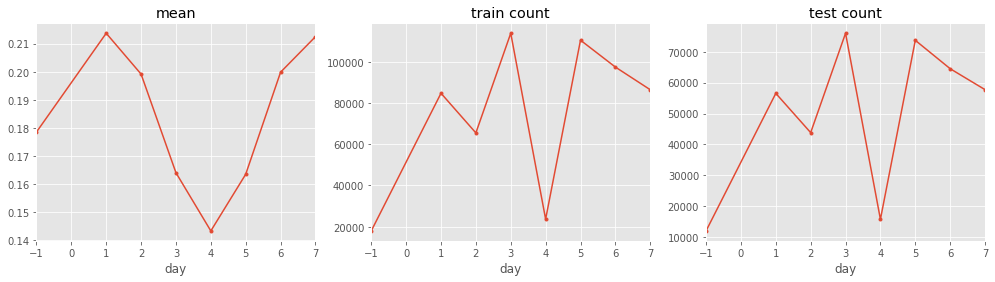

In [72]:
fig, ax = plt.subplots(1,3,figsize=(17,4))
train.groupby('day')['target'].mean().plot(ax=ax[0], marker='.')
train.groupby('day')['target'].count().plot(ax=ax[1], marker='.')
test.groupby('day')['day'].count().plot(ax=ax[2], marker='.')
ax[0].set_title('mean');
ax[1].set_title('train count');
ax[2].set_title('test count');

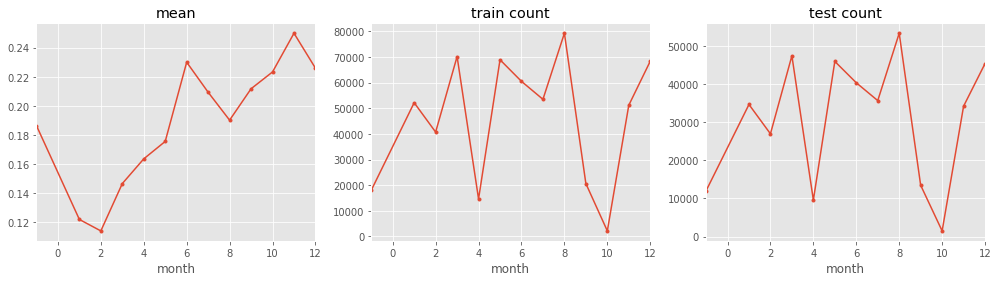

In [73]:
fig, ax = plt.subplots(1,3,figsize=(17,4))
train.groupby('month')['target'].mean().plot(ax=ax[0], marker='.')
train.groupby('month')['target'].count().plot(ax=ax[1], marker='.')
test.groupby('month')['month'].count().plot(ax=ax[2], marker='.')
ax[0].set_title('mean');
ax[1].set_title('train count');
ax[2].set_title('test count');

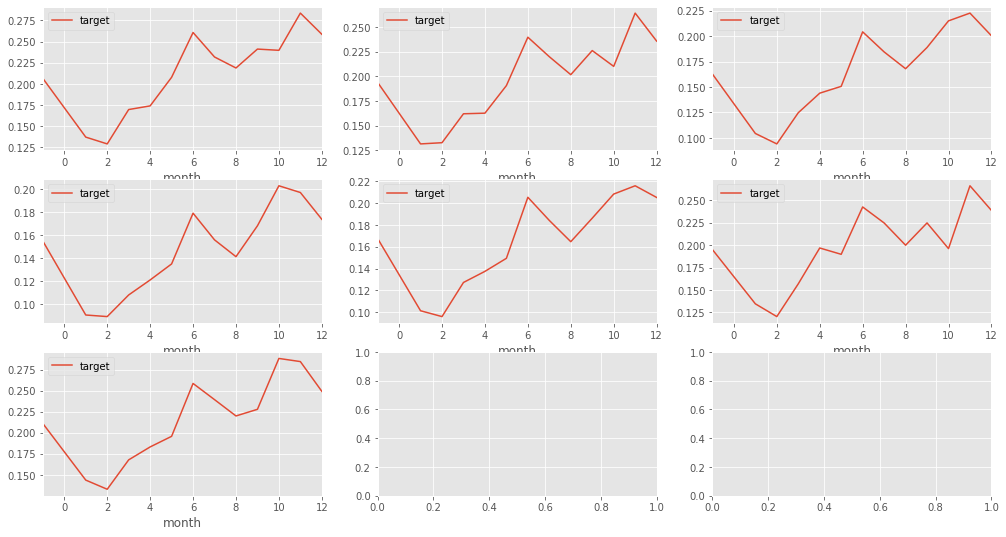

In [63]:
fig, ax = plt.subplots(3,3,figsize=(17,9))
train.loc[train['day']==1, ['month', 'target']].groupby('month').mean().plot(ax=ax[0,0])
train.loc[train['day']==2, ['month', 'target']].groupby('month').mean().plot(ax=ax[0,1])
train.loc[train['day']==3, ['month', 'target']].groupby('month').mean().plot(ax=ax[0,2])
train.loc[train['day']==4, ['month', 'target']].groupby('month').mean().plot(ax=ax[1,0])
train.loc[train['day']==5, ['month', 'target']].groupby('month').mean().plot(ax=ax[1,1])
train.loc[train['day']==6, ['month', 'target']].groupby('month').mean().plot(ax=ax[1,2])
train.loc[train['day']==7, ['month', 'target']].groupby('month').mean().plot(ax=ax[2,0]);

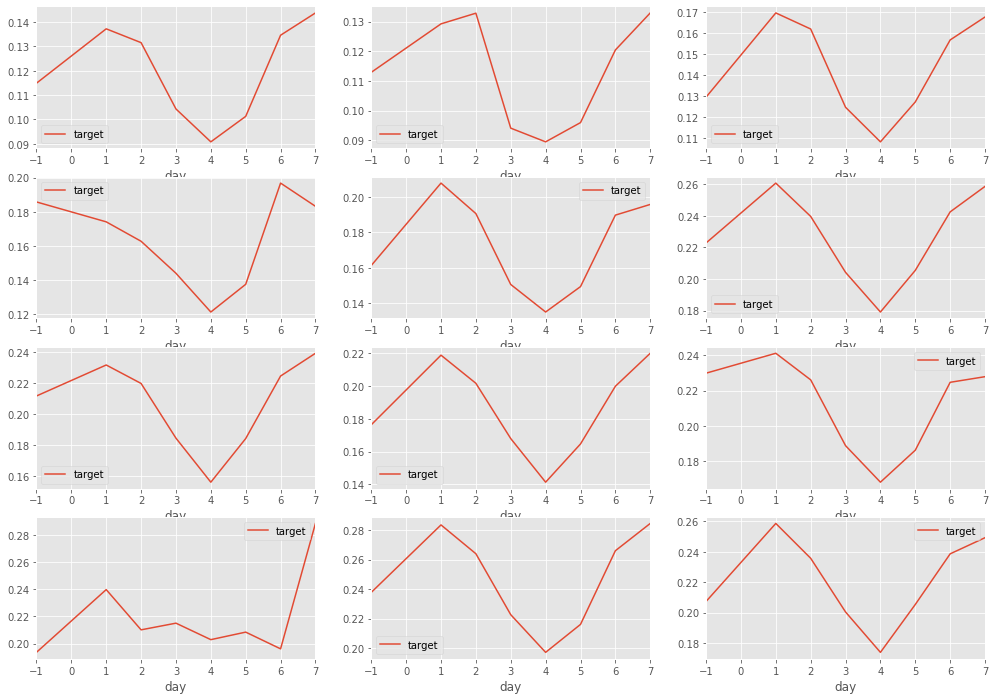

In [75]:
fig, ax = plt.subplots(4,3,figsize=(17,12))
train.loc[train['month']==1, ['day', 'target']].groupby('day').mean().plot(ax=ax[0,0])
train.loc[train['month']==2, ['day', 'target']].groupby('day').mean().plot(ax=ax[0,1])
train.loc[train['month']==3, ['day', 'target']].groupby('day').mean().plot(ax=ax[0,2])
train.loc[train['month']==4, ['day', 'target']].groupby('day').mean().plot(ax=ax[1,0])
train.loc[train['month']==5, ['day', 'target']].groupby('day').mean().plot(ax=ax[1,1])
train.loc[train['month']==6, ['day', 'target']].groupby('day').mean().plot(ax=ax[1,2])
train.loc[train['month']==7, ['day', 'target']].groupby('day').mean().plot(ax=ax[2,0]);
train.loc[train['month']==8, ['day', 'target']].groupby('day').mean().plot(ax=ax[2,1]);
train.loc[train['month']==9, ['day', 'target']].groupby('day').mean().plot(ax=ax[2,2]);
train.loc[train['month']==10, ['day', 'target']].groupby('day').mean().plot(ax=ax[3,0]);
train.loc[train['month']==11, ['day', 'target']].groupby('day').mean().plot(ax=ax[3,1]);
train.loc[train['month']==12, ['day', 'target']].groupby('day').mean().plot(ax=ax[3,2]);